# Questionnaire Spatial Strategies FRS


## Import packages 

In [15]:
import os
import matplotlib.pyplot as plt
import seaborn as sns
import ptitprince as pt
from statsmodels.stats.anova import *

In [16]:
# Data set loading
df_file = "/Users/tracysanchezpacheco/OneDrive/PhD/DataAnalysis/DataAnalysis/FRS/FRS.csv"
df = pd.read_csv(df_file, sep= ',')
df.describe()

,ID,Item1,Item2,Item3,Item4,Item5,Item6,Item7,Item8,Item9,...,Item11,Item12,Item13,Item14,Item15,Item16,Item17,Item18,Item19,Alter
count,22.000000,23.000000,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000,...,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000,22.00000
mean,5784.909091,4.652174,4.250000,3.750000,4.083333,4.625000,2.500000,4.000000,4.333333,3.416667,...,4.583333,4.708333,4.416667,4.166667,4.541667,4.458333,2.625000,3.750000,3.666667,23.50000
std,2646.825320,1.555305,1.725764,1.799758,1.612901,1.498187,1.351328,1.817787,1.493949,1.691839,...,1.639636,1.398109,1.316011,1.551063,1.587428,1.693444,1.582857,1.293798,1.578846,4.55391
min,365.000000,2.000000,2.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,...,2.000000,2.000000,2.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,19.00000
25%,4026.000000,3.500000,2.750000,2.000000,3.000000,3.750000,1.000000,3.000000,3.000000,2.000000,...,3.000000,3.750000,3.000000,3.000000,3.000000,3.000000,1.000000,3.000000,2.750000,20.25000
50%,5636.000000,5.000000,4.500000,3.000000,4.000000,5.000000,2.000000,3.500000,5.000000,3.000000,...,4.500000,5.000000,5.000000,4.000000,5.000000,5.000000,2.500000,4.000000,3.000000,23.00000
75%,7734.500000,6.000000,6.000000,5.000000,5.250000,6.000000,4.000000,5.000000,5.000000,4.250000,...,6.000000,5.250000,5.250000,6.000000,6.000000,6.000000,3.000000,5.000000,5.000000,23.75000
max,9601.000000,7.000000,7.000000,7.000000,7.000000,7.000000,5.000000,7.000000,7.000000,7.000000,...,7.000000,7.000000,6.000000,6.000000,7.000000,7.000000,6.000000,6.000000,7.000000,37.00000


## „Globale Einschätzung der Orientierungsfähigkeit mit Richtungs- und Wegstrategie“

In [17]:
df["Global"] = df[["Item1", "Item4", "Item5", "Item8", "Item10", "Item12", "Item13", "Item14", "Item15",
"Item18"]].mean(axis=1)
df["Global"].describe()

count    24.000000
mean      4.332407
std       1.116061
min       2.100000
25%       3.725000
50%       4.250000
75%       5.325000
max       5.800000
Name: Global, dtype: float64

## „Verwendung einer Überblicksstrategie“

In [18]:
df["Overview"] = df[["Item2", "Item3", "Item7", "Item9", "Item11", "Item16", "Item19"]].mean(axis=1)
df["Overview"].describe()

count    24.000000
mean      4.017857
std       1.390366
min       1.714286
25%       2.857143
50%       3.857143
75%       4.785714
max       6.857143
Name: Overview, dtype: float64

## „Kenntnis der Himmelsrichtungen“

In [19]:
df["Cardinal"] = df[["Item6", "Item17"]].mean(axis=1)
df["Cardinal"].describe()

count    24.000000
mean      2.562500
std       1.369802
min       1.000000
25%       1.375000
50%       2.500000
75%       3.625000
max       5.500000
Name: Cardinal, dtype: float64

In [20]:
df1 = df.iloc[:, [2,22,24,25,26]].copy()
FRSsubs= df1.dropna()
FRSsubs.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22 entries, 0 to 23
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   ID        22 non-null     float64
 1   Alter     22 non-null     float64
 2   Global    22 non-null     float64
 3   Overview  22 non-null     float64
 4   Cardinal  22 non-null     float64
dtypes: float64(5)
memory usage: 1.0 KB


In [21]:
FRSsubsLong = pd.melt(FRSsubs, id_vars=['ID'], value_vars=["Global", "Overview", "Cardinal"], var_name='Subscale', value_name='Average')
FRSsubsLong.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66 entries, 0 to 65
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   ID        66 non-null     float64
 1   Subscale  66 non-null     object 
 2   Average   66 non-null     float64
dtypes: float64(2), object(1)
memory usage: 1.7+ KB


## Export File to CSV

In [22]:
os.chdir('/Users/tracysanchezpacheco/Documents/Resources')
FRSsubs.to_csv('FRSsubs.csv')

## Plotting

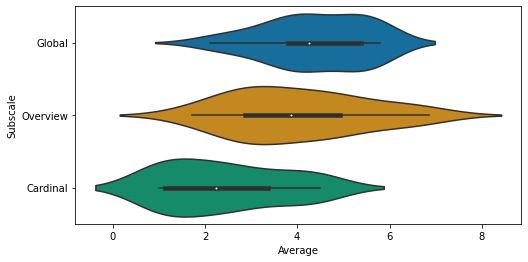

In [23]:
dy="Subscale"; dx="Average"; ort="H"; pal = sns.color_palette("Set2"); sigma = .2
sns.set_palette('colorblind')
#create figure and axes objects of a predefined size
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(8,4))
sns.violinplot(data= FRSsubsLong, x=dx, y=dy, scale="width")
plt.show()

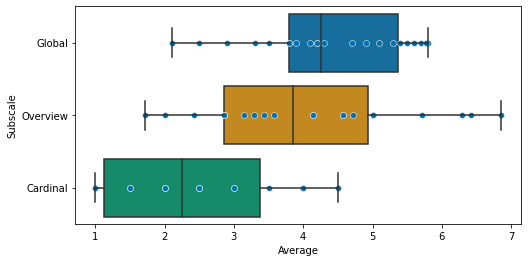

In [24]:
dy="Subscale"; dx="Average"; ort="H"; pal = sns.color_palette("Set2"); sigma = .2
sns.color_palette("Set2")
#create figure and axes objects of a predefined size
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(8,4))
sns.boxplot(data= FRSsubsLong, x=dx, y=dy)
sns.scatterplot(data= FRSsubsLong, x=dx, y=dy)
plt.show()

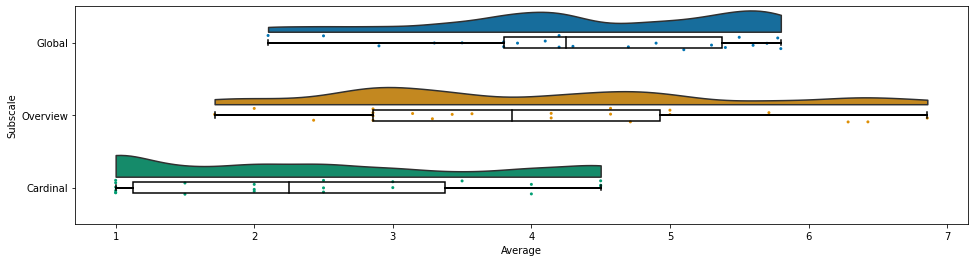

In [25]:

dy="Subscale"; dx="Average"; ort="h"; pal = sns.color_palette(); sigma = .2
f, ax = plt.subplots(figsize=(16, 4))

ax=pt.half_violinplot( x = dx, y = dy, data =
FRSsubsLong, palette = pal, bw = .2, cut = 0.,
                      scale = "area", width = .6, inner = None, orient = ort)
ax=sns.stripplot( x = dx, y = dy, data = FRSsubsLong, palette = pal, edgecolor = "white",
                 size = 3, jitter = 1, zorder = 0, orient = ort)
ax=sns.boxplot( x = dx, y = dy, data = FRSsubsLong, color = "black", width = .15, zorder = 10,\
            showcaps = True, boxprops = {'facecolor':'none', "zorder":10},\
            showfliers=True, whiskerprops = {'linewidth':2, "zorder":10},\
               saturation = 1, orient = ort) 